# Guía 2 - Ejercicio 8

Efectúe una clasificación por LDA de los datos abalone.txt, discriminando entre adulto e
infante, utilizando aquellas variables que considere más pertinenes. Elija el mejor modelo, usando
criterio, sentido común y alguno de los métdos propuestos vistos en clase para determinarlo. Se
recomienda separar inicialmente un 20 %, 30 % de lo datos para poder hacer la evaluación final a
través de una matriz de confusión.

Antes que nada, se cargará el dataset con el que se trabajará:


In [32]:
library(MASS)
library("dplyr")
library("ggpubr")
library("nortest")
library(grid)
library(gridExtra)
# Cargo los datos
mydata<-read.table("abalone.txt", sep=",", col.names=c("Género", "Longitud", 
                                                       "Diámetro","Altura","Peso completo","Peso Carne",
                                                       "Peso Vísceras","Peso Caparazón","Anillos"))

Visualicemos la estructura de estos datos:

In [33]:
head(mydata)
summary(mydata)

Género,Longitud,Diámetro,Altura,Peso.completo,Peso.Carne,Peso.Vísceras,Peso.Caparazón,Anillos
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


 Género      Longitud        Diámetro          Altura       Peso.completo   
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
   Peso.Carne     Peso.Vísceras    Peso.Caparazón      Anillos      
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

Agreguemos ahora una columna que contenga la categoría "Adulto" o "Infante". La misma se calculará a partir de la columna "Género". Si es "F" o "M" será "A" de adulto. Si es "I" se dejará "I".

In [34]:
mydata$Adulto <- FALSE
mydata$Adulto[mydata$Género== "M"] <- TRUE
mydata$Adulto[mydata$Género == "F"] <- TRUE
head(mydata)

Género,Longitud,Diámetro,Altura,Peso.completo,Peso.Carne,Peso.Vísceras,Peso.Caparazón,Anillos,Adulto
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,TRUE
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,TRUE
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,TRUE
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,TRUE
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,FALSE
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,FALSE


El siguiente paso es corroborar las suposiciones sobre las que se basa el método de LDA. Ellas son:

- Normalidad de las variables
- Homogeneidad de la varianza
- Incorrelación de los predictores

## Normalidad de las variables

Vamos a aplicar dos métodos para verificar la normalidad de las variables:

- qqplot: inspección visual
- Lilliefors: Similar al método de Kolmogorov-Smirnov pero cuando se desconocen media y desvío estandar.

El método de Shapiro-Wilk no se aplicará ya que está recomendado para menos de 50 observaciones.  
Si bien el método de Kolmogorov-Smirnov (K-S) está recomendado para más de 50 observaciones, darpara aplicarlo lo mejor es conocer la media y el desvío estandar y no sus estimaciones.

Las variables que se van a considerar en principio son todas, es decir:

Longitud, Diámetro, Altura, Peso Completo, Peso Carne, Peso Vísceras, Peso Caparazón, Anillos

Empecemos analizando la variable Longitud:

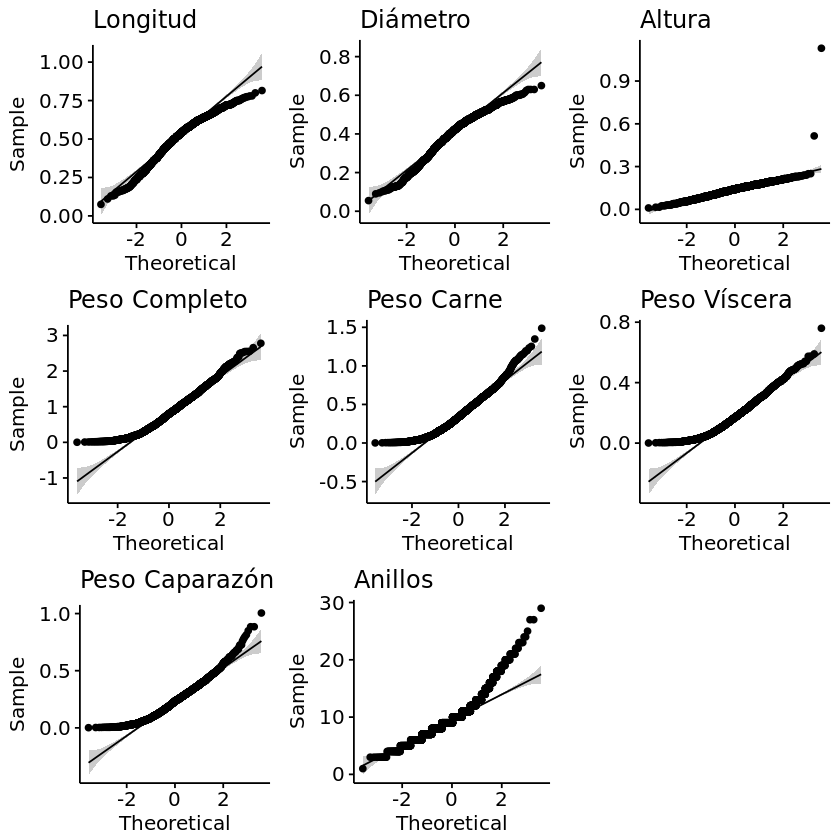

In [62]:
data_size=nrow(mydata)
train_size <- floor(0.7 * data_size)
## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(data_size), size = train_size)
train <- mydata[train_ind, ] #training set
test <- mydata[-train_ind, ] #test set

g1 <- ggqqplot(train$Longitud,main = "Longitud")
g2 <- ggqqplot(train$Diámetro,main = "Diámetro")
g3 <- ggqqplot(train$Altura,main = "Altura")
g4 <- ggqqplot(train$Peso.completo ,main = "Peso Completo")
g5 <- ggqqplot(train$Peso.Carne,main = "Peso Carne")
g6 <- ggqqplot(train$Peso.Víscera,main = "Peso Víscera")
g7 <- ggqqplot(train$Peso.Caparazón,main = "Peso Caparazón")
g8 <- ggqqplot(train$Anillos,main = "Anillos")
g1grob <- ggplotGrob(g1)
g2grob <- ggplotGrob(g2)
g3grob <- ggplotGrob(g3)
g4grob <- ggplotGrob(g4)
g5grob <- ggplotGrob(g5)
g6grob <- ggplotGrob(g6)
g7grob <- ggplotGrob(g7)
g8grob <- ggplotGrob(g8)
grid.arrange(g1grob, g2grob,g3grob, g4grob,g5grob, g6grob,g7grob, g8grob)

Se observa en las figuras anteriores que alrededor de la zona central de la distribución, en general se cumple la suposición de normalidad, pero esta suposición se pierde hacia los bordes. Ello es esperable, ya que longitudes, pesos y cantidades no pueden tomar valores negativos en la práctica, pero están definidos para una distribución normal. Es por ello que a simple vista se observa que no se cumple la condición de normalidad.
Vamos a verificar esta observación con el método de Lilliefors:

In [63]:
lillie.test(train$Longitud)
lillie.test(train$Diámetro)
lillie.test(train$Altura)
lillie.test(train$Peso.completo)
lillie.test(train$Peso.Carne)
lillie.test(train$Peso.Vísceras)
lillie.test(train$Peso.Caparazón)
lillie.test(train$Anillos)



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Longitud
D = 0.073756, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Diámetro
D = 0.075032, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Altura
D = 0.052729, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Peso.completo
D = 0.049124, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Peso.Carne
D = 0.055441, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Peso.Vísceras
D = 0.05396, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Peso.Caparazón
D = 0.047887, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  train$Anillos
D = 0.14647, p-value < 2.2e-16


Todos los p-value están muy por debajo del valor de corte de 0.05, el cual es el que debe ser superado para poder suponer normalidad.
Si bien no se cumple la condición de normalidad, seguiremos adelante con el método ya que muchas veces da buenos resultados sin cumplir esta condición.

## Incorrelación de los predictores

Para analizar la correlación de las variables veamos la matriz de correlación cruzada de los predictores:

In [64]:
#Borro del trainset las columnas que no me sirven
train$Género <- NULL
train_labels <- train$Adulto
train$Adulto <- NULL

In [65]:
library("Hmisc")
res2 <- rcorr(as.matrix(train))
res2

               Longitud Diámetro Altura Peso.completo Peso.Carne Peso.Vísceras
Longitud           1.00     0.99   0.80          0.92       0.90          0.90
Diámetro           0.99     1.00   0.81          0.93       0.90          0.90
Altura             0.80     0.81   1.00          0.80       0.76          0.78
Peso.completo      0.92     0.93   0.80          1.00       0.97          0.97
Peso.Carne         0.90     0.90   0.76          0.97       1.00          0.93
Peso.Vísceras      0.90     0.90   0.78          0.97       0.93          1.00
Peso.Caparazón     0.90     0.90   0.80          0.95       0.88          0.91
Anillos            0.56     0.57   0.54          0.54       0.42          0.51
               Peso.Caparazón Anillos
Longitud                 0.90    0.56
Diámetro                 0.90    0.57
Altura                   0.80    0.54
Peso.completo            0.95    0.54
Peso.Carne               0.88    0.42
Peso.Vísceras            0.91    0.51
Peso.Caparazón         

Según se ve, las métricas lineales (Longitud, Diámetro y altura) están altamente correlacionadas. Eliminaremos los predictores Diámetro y nos quedaremos con Longitud y Altura (que tienen una correlción de 0.8).
También es notable la alta correlación que hay entre los cuatro pesos: Completo, Carne, Vísceras y Caparazón. Siendo que casi todas estas correlaciones están por encima de 0.9, nos quedaremos solo con dos de ellos: Peso Caparazón y Peso Carne, que tienen una correlación de 0.88.
Por último conservaremos Anillos que tiene correlación mas baja con respecto a todas las variables.

In [66]:
train$Diámetro <- NULL
train$Peso.completo <- NULL
train$Peso.Vísceras <- NULL
res2 <- rcorr(as.matrix(train))
res2

               Longitud Altura Peso.Carne Peso.Caparazón Anillos
Longitud           1.00   0.80       0.90           0.90    0.56
Altura             0.80   1.00       0.76           0.80    0.54
Peso.Carne         0.90   0.76       1.00           0.88    0.42
Peso.Caparazón     0.90   0.80       0.88           1.00    0.63
Anillos            0.56   0.54       0.42           0.63    1.00

n= 2923 


P
               Longitud Altura Peso.Carne Peso.Caparazón Anillos
Longitud                 0      0          0              0     
Altura          0               0          0              0     
Peso.Carne      0        0                 0              0     
Peso.Caparazón  0        0      0                         0     
Anillos         0        0      0          0                    

Si bien una de las hipótesis de LDA es que los predictores son incorrelacionados, seguiremos método adelante para evaluar cómo funciona para este caso.

## Homogeneidad de la varianza / covarianza

Para el caso de la homogeneidad de la varianza seremos mas rigurosos ya que en el caso de no cumplirse debemos utilizar el método QDA en vez del LDA. En el caso de fallar el test, utilizaremos QDA y LDA y compararemos los resultados.
Se utilizará el test de Levene para evaluar la homogeneidad de la varianza.

In [78]:
train$Adulto <- train_labels
train1 <- train[train[,"Adulto"]==TRUE,]
train2 <- train[train[,"Adulto"]==FALSE,]

In [80]:
cov(train1)

,Longitud,Altura,Peso.Carne,Peso.Caparazón,Anillos,Adulto
Longitud,0.009299901,0.002539260,0.01811298,0.010833319,0.09051062,0
Altura,0.002539260,0.001600666,0.00531709,0.003530592,0.03815249,0
Peso.Carne,0.018112976,0.005317090,0.04484518,0.022612197,0.10326779,0
Peso.Caparazón,0.010833319,0.003530592,0.02261220,0.017029547,0.18943797,0
Anillos,0.090510621,0.038152488,0.10326779,0.189437970,9.81693290,0
Adulto,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0


In [81]:
cov(train2)

,Longitud,Altura,Peso.Carne,Peso.Caparazón,Anillos,Adulto
Longitud,0.011911119,0.003181267,0.012478980,0.008431423,0.19095927,0
Altura,0.003181267,0.001014043,0.003475478,0.002426964,0.05894278,0
Peso.Carne,0.012478980,0.003475478,0.016321189,0.009922771,0.20317507,0
Peso.Caparazón,0.008431423,0.002426964,0.009922771,0.007231195,0.15800704,0
Anillos,0.190959272,0.058942782,0.203175070,0.158007040,6.44899289,0
Adulto,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0


Si bien lo correcto sería analizar la varianza del estimador de covarianza y hacer un test de hipótesis para la igualdad de ambas matrices de covarianza, se intuye que no se cumple la condición de homosedasticidad, por lo que evaluaremos el clasificador que obtenemos con LDA con el que obtenemos con QDA y sacaremos algunas conclusiones.

# Clasificador utilizando LDA

In [86]:
clf <- lda(formula = Adulto ~ ., data = train)

In [96]:
# Probabilidades a priori
clf$prior

FALSE      TRUE 
0.3274034 0.6725966

In [97]:
# conteo de observaciones de cada una de las clases
clf$counts

FALSE  TRUE 
  957  1966

In [98]:
# Medias de cada uno de los predictores
clf$means

,Longitud,Altura,Peso.Carne,Peso.Caparazón,Anillos
FALSE,0.4243992,0.107419,0.1881526,0.1260658,7.829676
TRUE,0.5702467,0.154649,0.4406887,0.2931923,10.941506


In [100]:
# Estos son los valores de escalamiento de cada uno de los predictores en las dimensiones 
# de LDA para generar las funciones de discriminación
clf$scaling

,LD1
Longitud,3.1934379
Altura,4.1704465
Peso.Carne,1.8869373
Peso.Caparazón,0.2623481
Anillos,0.1253992


In [102]:
test$Género <- NULL
test$Diámetro <- NULL
test$Peso.completo <- NULL
test$Peso.Vísceras <- NULL
test_labels <- test$Adulto
test$Adulto <- NULL

In [103]:
plda = predict(object = clf, # predictions
               newdata = test)

In [112]:
#Medición del accuracy 

sum(test_labels==plda$class)/length(test_labels)

[1] 0.791866

Con estas decisiones se ha logrado una precisión del 79%. Veamos la matriz de confusión:

In [141]:
library(SDMTools)
confusion.matrix(as.integer(test_labels), plda$posterior[,2], threshold = 0.5)

    obs
pred   0   1
   0 227 103
   1 158 766
attr(,"class")
[1] "confusion.matrix"

Repitamos el proceso para todos los predictores

In [148]:
set.seed(123)
train_ind <- sample(seq_len(data_size), size = train_size)
train <- mydata[train_ind, ] #training set
test <- mydata[-train_ind, ] #test set


In [149]:
train$Género <- NULL
test$Género <- NULL
test_labels <- test$Adulto
test$Adulto <- NULL
clf2 <- lda(formula = Adulto ~ ., data = train)
plda2 = predict(object = clf2, # predictions
               newdata = test)

#Medición del accuracy 
sum(test_labels==plda2$class)/length(test_labels)



[1] 0.7950558

En principio el cambio que se observa en el accuracy es despreciable. Veamos qué ocurre con la matriz de confusión.

In [150]:
confusion.matrix(as.integer(test_labels), plda2$posterior[,2], threshold = 0.5)

    obs
pred   0   1
   0 233 105
   1 152 764
attr(,"class")
[1] "confusion.matrix"

Si la comparamos con la matriz del clasificador LDA con menos predictores, veremos que la diferencia es muy poca y que si bien la cantidad de verdaderos negativos aumentó con todos los predictores disponibles, la cantidad de verdaderos positivos disminuyó.

In [152]:
confusion.matrix(as.integer(test_labels), plda$posterior[,2], threshold = 0.5)

    obs
pred   0   1
   0 227 103
   1 158 766
attr(,"class")
[1] "confusion.matrix"

# Clasificador utilizando QDA

En principio y por facilidad computacional (ya están preparados train y test) veremos qué pasa con QDA con todos los predictores:

In [153]:
clf3 <- qda(formula = Adulto ~ ., data = train)
plda3 = predict(object = clf3, # predictions
               newdata = test)

#Medición del accuracy 
sum(test_labels==plda3$class)/length(test_labels)


[1] 0.7496013

In [154]:
confusion.matrix(as.integer(test_labels), plda3$posterior[,2], threshold = 0.5)

    obs
pred   0   1
   0 322 251
   1  63 618
attr(,"class")
[1] "confusion.matrix"

Y ahora veamos los mismos datos pero para el grupo de predictores reducidos:

In [155]:
train$Diámetro <- NULL
train$Peso.completo <- NULL
train$Peso.Vísceras <- NULL
test$Diámetro <- NULL
test$Peso.completo <- NULL
test$Peso.Vísceras <- NULL
clf4 <- qda(formula = Adulto ~ ., data = train)
plda4 = predict(object = clf4, # predictions
               newdata = test)

#Medición del accuracy 
sum(test_labels==plda4$class)/length(test_labels)


[1] 0.7551834

In [156]:
confusion.matrix(as.integer(test_labels), plda4$posterior[,2], threshold = 0.5)

    obs
pred   0   1
   0 320 242
   1  65 627
attr(,"class")
[1] "confusion.matrix"

## Clasificador utilizando regresión logística

In [165]:
clf5 <- glm(formula = Adulto ~ ., family=binomial(link='logit'),data = train)
plda5 = predict(object = clf5, # predictions
               newdata = test)
plda5<-predict(clf5, test,type="response")
#Medición del accuracy 
sum(test_labels-plda5<0.5)/length(test_labels)


[1] 0.9011164

In [163]:
confusion.matrix(as.integer(test_labels), plda5, threshold = 0.5)

    obs
pred   0   1
   0 264 124
   1 121 745
attr(,"class")
[1] "confusion.matrix"

# Resumen y conclusiones

Se aplicaron LDA y QDA para el dataset propuesto por la cátedra. Al verificar el cumplimiento de las hipótesis de LDA mencionadas anteriormente, se vió que no se cumple ninguna.  
De todas formas se probó el método eliminando predictores con alta correlación y se vió una mejora con respecto al uso de la probabilidad a priori (67% contra 79%, un 12 % de mejoría). El uso de los predictores con fuerte correlación no provocó ninguna mejora significativa ni en el accuracy, ni en la matriz de confusión.
Con QDA la performance bajó levemente, no necesariamente tenía que mejorar ya que no se cumplen las hipótesis del modelo probabilístico. Esta baja se vió tanto en el modelo con predictores reducidos, como con el uso de todos los predictores (74 y 75 % de accuracy respectivamente).
Para finalizar se hizo una clasificación con un regresor lineal y se obtuvo una mejora significativa con respecto a LDA, tanto en el accuracy (90%) como en la matriz de confusión.  

En conclusión, si bien el clasificador LDA no alcanzó el rendimiento del regresor logístico, mostró resultados significativos a pesar de que los datos no cumplen con las hipótesis. Es por ello que ante un problema de clasificación se lo puede tener en cuenta a pesar de no ser el clasificador Bayesiano óptimo (si no se cumplen las hipótesis).